# Script to plot figures 4 & 5: model anomlies

In [1]:
#Input Data: 
modelDataPath = 'Data/Model/' #netcdf of model data. Unique my model/season. Each contains multiple climate variables

#Load Packages
import cartopy.crs         as ccrs
import cartopy.feature     as cfeature
import cartopy.util        as cutil
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec
from   mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy               as np
import os
import pandas              as pd 
#import regionmask          as rm
from   scipy               import stats
import warnings
import xarray              as xr

warnings.filterwarnings('ignore')
print("Packages Loaded")

Packages Loaded


In [2]:
#Set Working Directory
wd = '/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/HoloceneHydroclimate/HoloceneHydroclimate'
os.chdir(wd)
print('Working directory set to: '+wd)

Working directory set to: /Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/HoloceneHydroclimate/HoloceneHydroclimate


In [3]:
#Plot Agreement Settings

#Model Data to Plot
seasons   = ['ANN','JJA','DJF']
variables = ['pre','p-e','tas']
ka = [0.5,6,12] #For transient bins

#True/False to save/not save
save = True 

#Plot Settings
font = 'Times New Roman'
plt.rcParams['font.family'   ] = font
plt.rcParams['axes.facecolor'] ='white'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams.update({'font.size': 10})

#Print summary
if save: print("Settings chosen to save "+str(seasons)+" "+str(variables))
else:    print("Settings chosen to plot "+str(seasons)+" "+str(variables))

Settings chosen to save ['ANN', 'JJA', 'DJF'] ['pre', 'p-e', 'tas']


In [4]:
#Load Model Data. TraCE & HadCM
modelData = {}
for model in ['hadcm','trace','cmip6']:
    modelData[model] = {}
    for szn in ['ANN','JJA','DJF']:
        if model == 'cmip6': end = '.nc'
        else: end =  '.nc'
        handle = xr.open_dataset(modelDataPath+model+'/'+model+'_'+szn+end,decode_times=False)
        modelData[model][szn] = handle
        handle.close()
    print(model+" "+str(sorted([i for i in modelData[model][szn].data_vars]))+' loaded')
    
#Define ipcc region data
#refReg     = rm.defined_regions.ar6.all
#refRegLand = rm.defined_regions.ar6.land
#
transmodels  = ['trace','hadcm']

hadcm ['evp', 'p-e', 'pre', 'tas'] loaded
trace ['evp', 'p-e', 'pre', 'tas'] loaded
cmip6 ['evp', 'p-e', 'pre', 'tas'] loaded


# Figure 4

plot saved


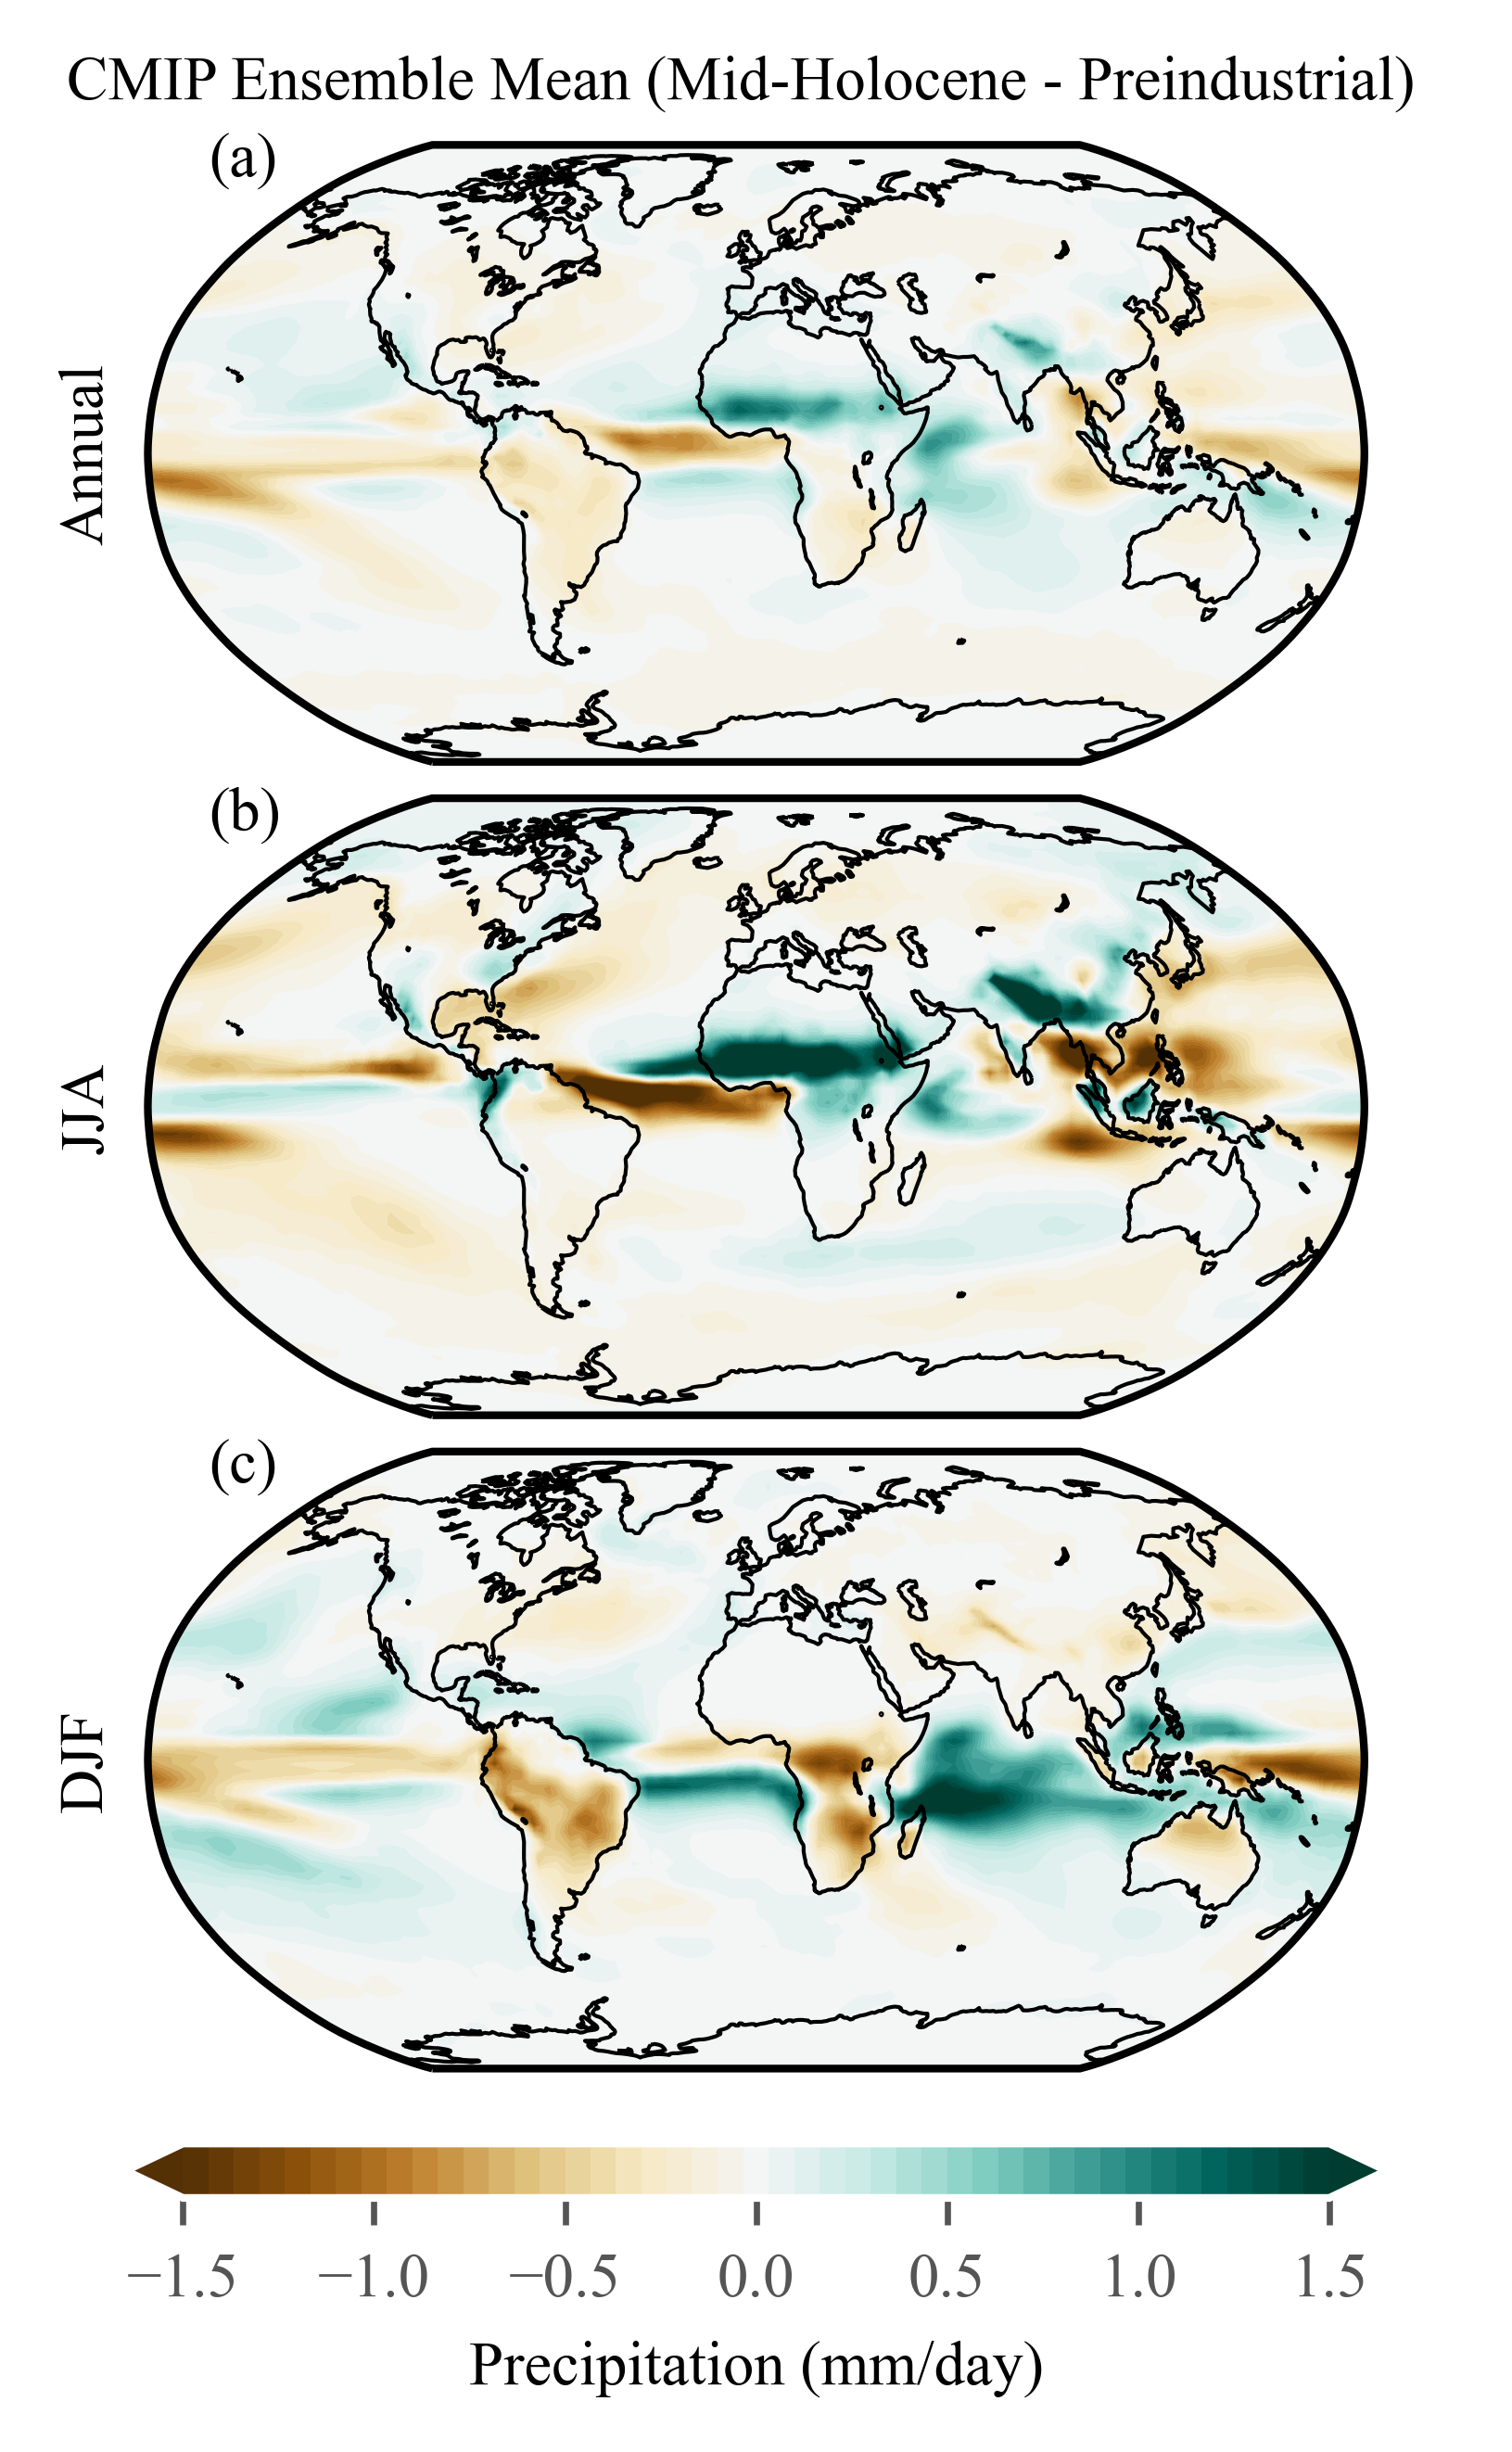

plot saved
plot saved


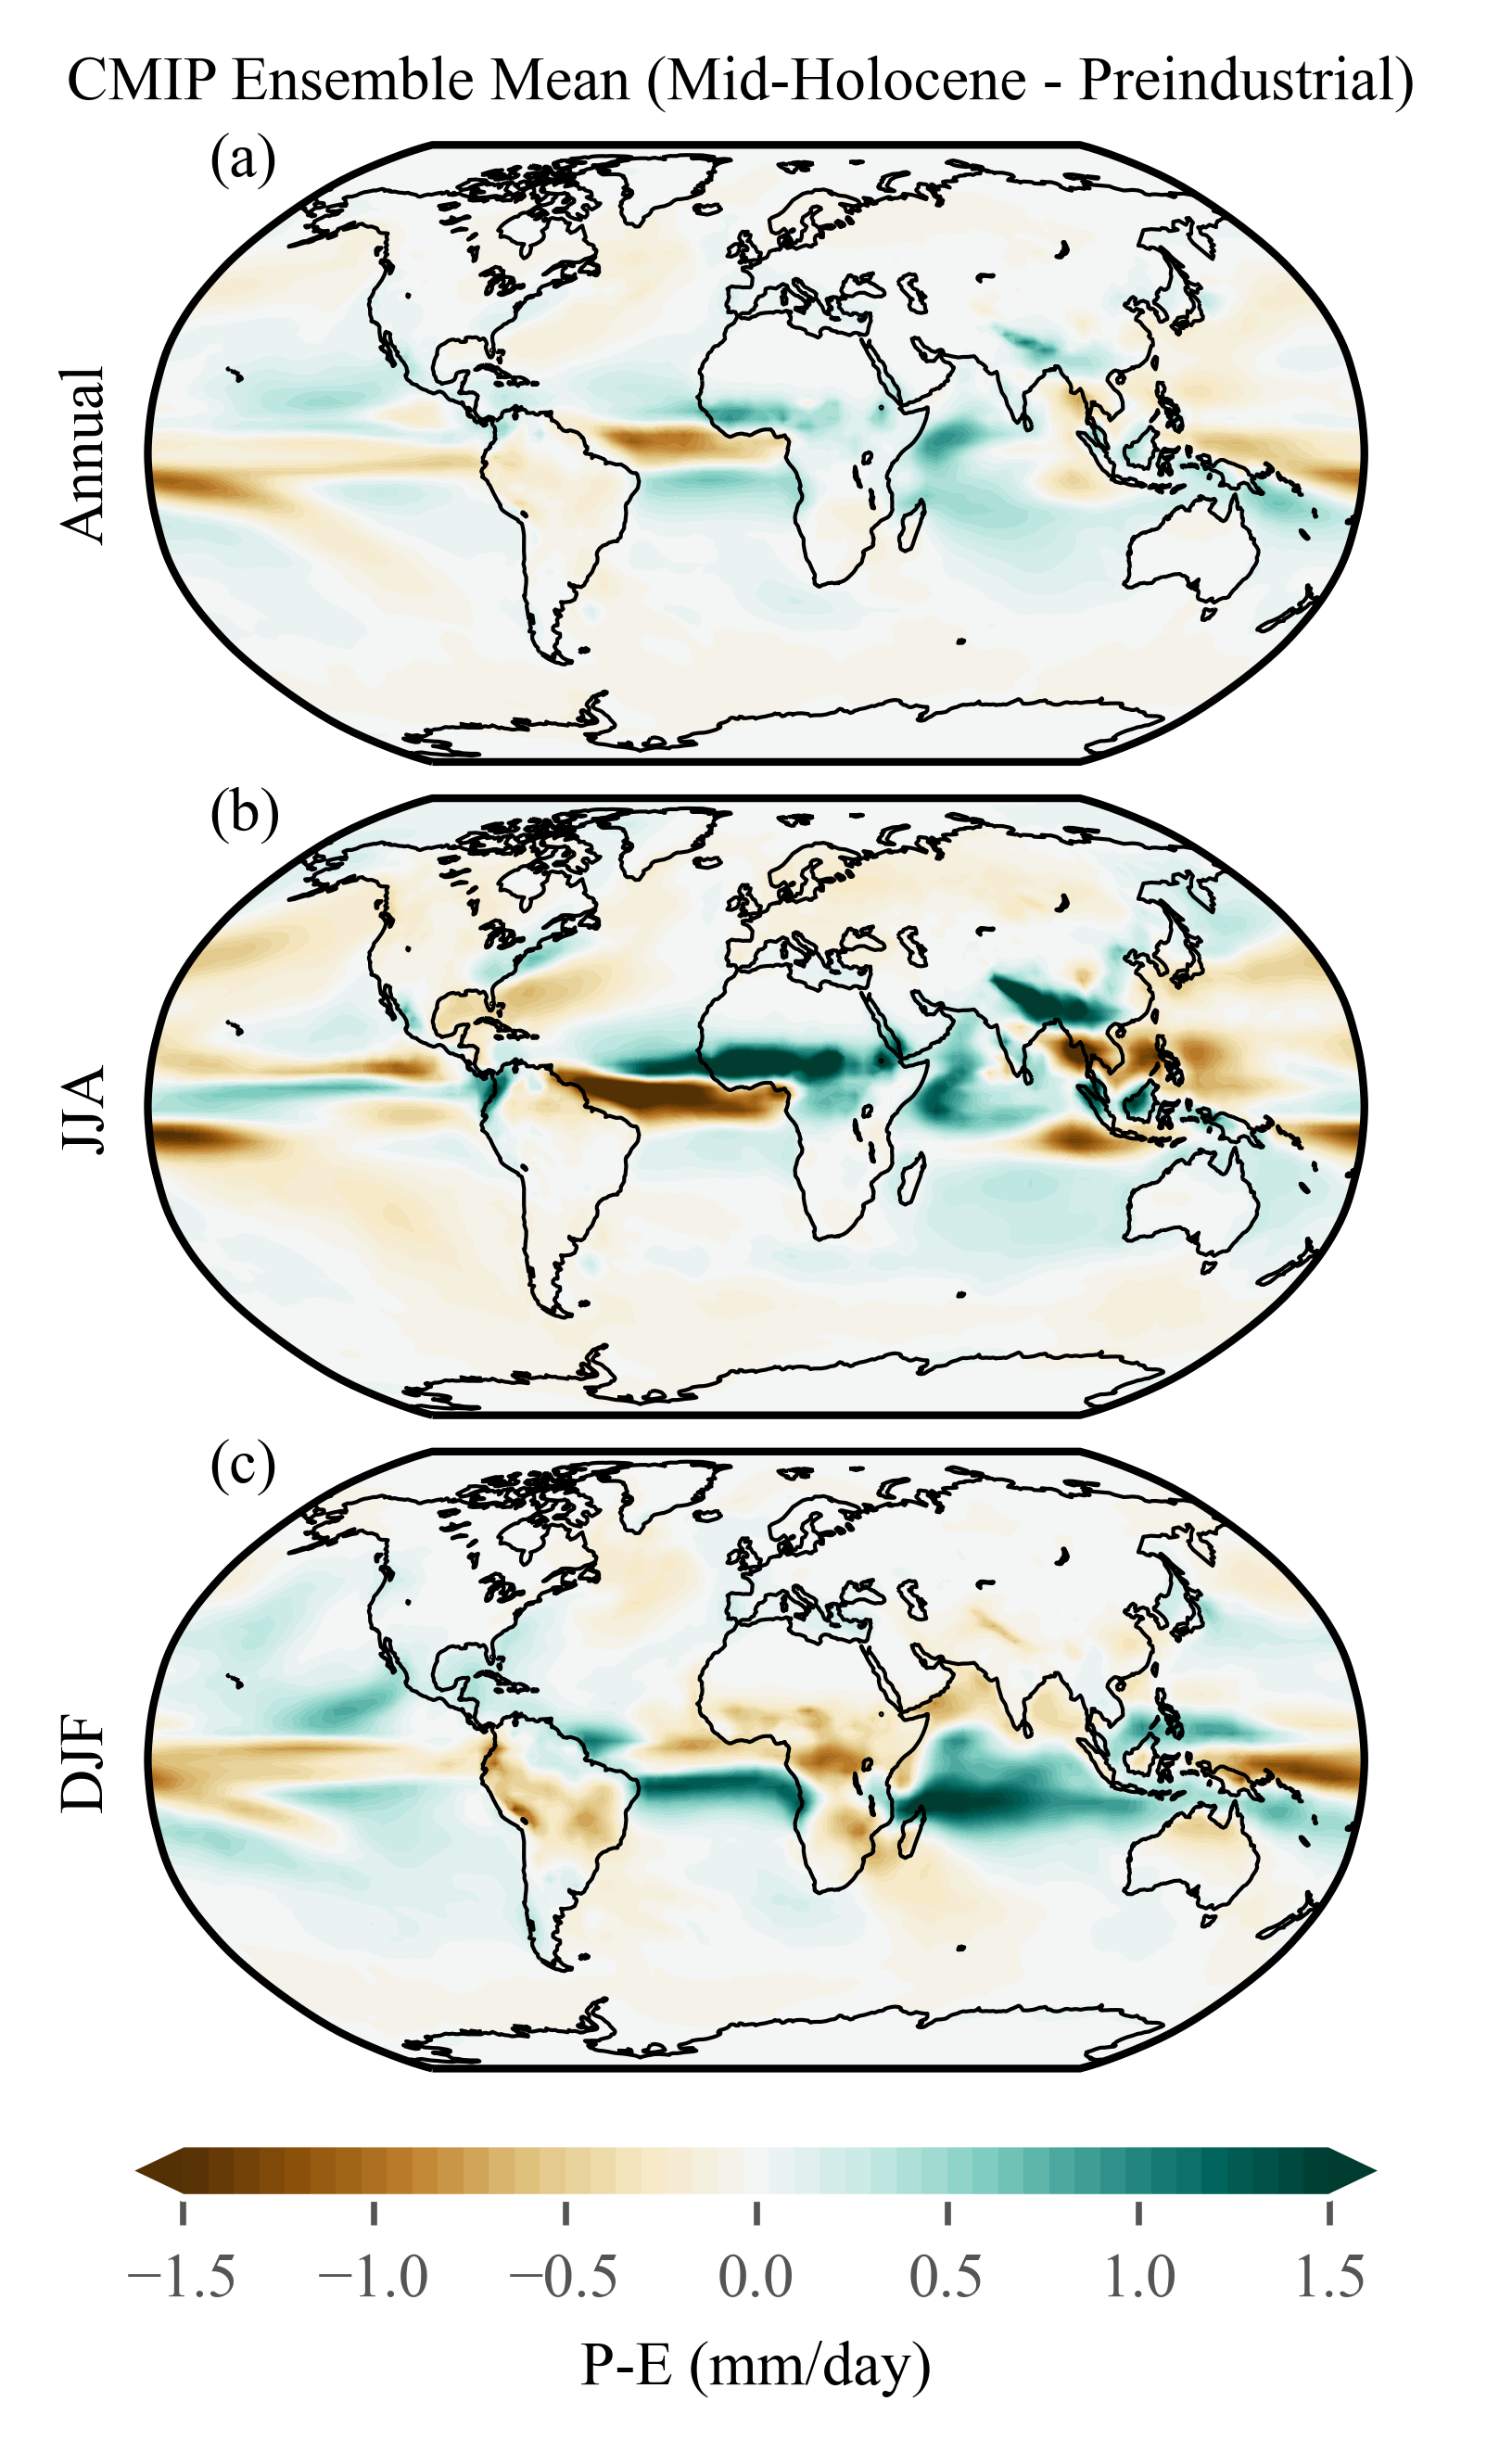

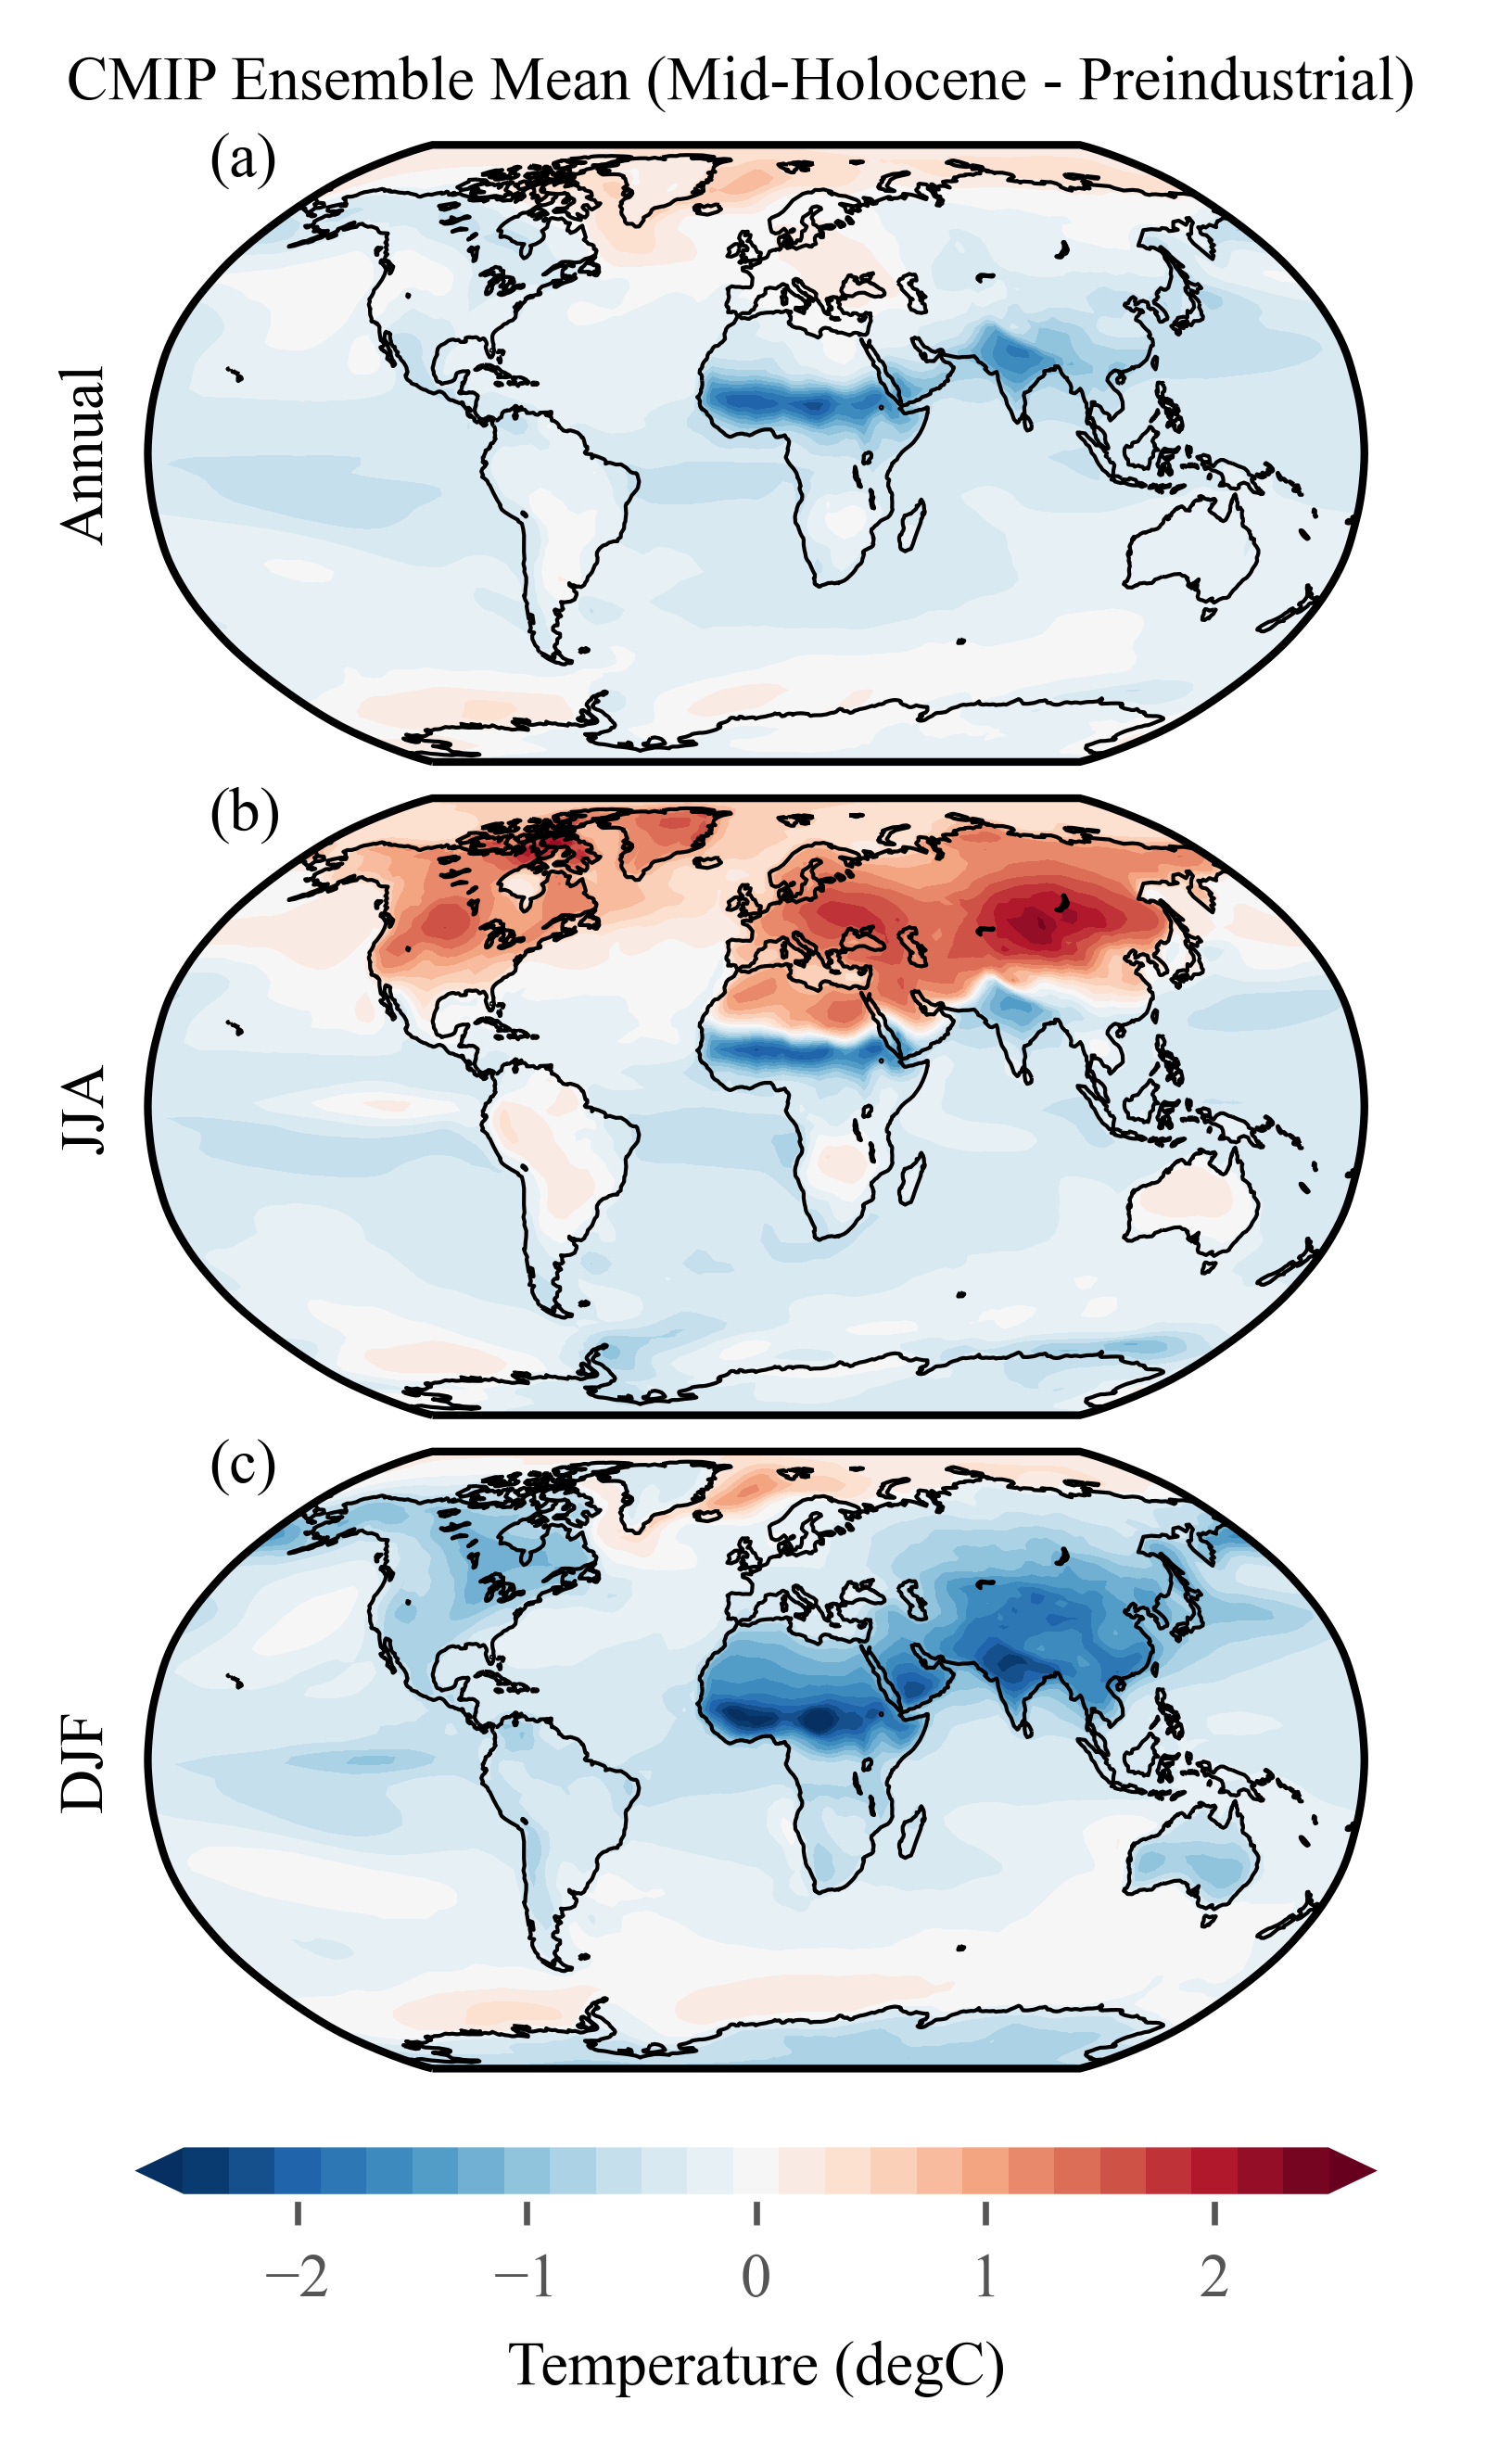

In [5]:
s     = 3
for var in variables:
    label = 0
    if var == 'tas': 
        cramp, units, varname, n = 'RdBu_r','degC', 'Temperature', ['Cooler at 6 ka','Warmer at 6 ka']
        mlevels = np.array([i /100 for i in list(range(-250,251,20))])
        ticklabels = [-2.0,-1.0,0,1.0,2.0]
    else:            
        cramp, units, varname, n = 'BrBG', 'mm/day', 'Precipitation', ['Drier at 6 ka','Wetter at 6 ka',]
        if var != 'pre': varname = var.upper()
        mlevels = np.linspace(-1.5,1.5,46)
        ticklabels = np.linspace(-1.5,1.5,7)
    #Plot Figure
    plt.style.use('ggplot')
    plt.figure(figsize=(3.25,5),dpi=600)
    h=len(seasons)
    gs = gridspec.GridSpec(h*s+1,s)
    for szn in seasons:
        data = modelData['cmip6'][szn][var]
        #data = data.rename({'lat_regrid':'lat','lon_regrid':'lon'})
        data = np.mean(data,axis=0)
        i = [x for x, val in enumerate(seasons) if val == szn][0]
        ax = plt.subplot(gs[(i)*s:(i)*s+s,0:s],projection=ccrs.Robinson()) 
        ax.spines['geo'].set_edgecolor('black')
        data_cyclic,lon_cyclic = cutil.add_cyclic_point(data,coord=data.lon.data)
        model_contour = plt.contourf(lon_cyclic, data.lat.data, 
                                     data_cyclic,transform=ccrs.PlateCarree(),
                                     levels=mlevels,extend='both',cmap=cramp) 
        if szn == 'ANN':
            ax.annotate('CMIP Ensemble Mean (Mid-Holocene - Preindustrial)  ',
                        xy=(0, 0), xycoords='data',fontsize=8, xytext=(0.5, 1.1), 
                        textcoords='axes fraction',horizontalalignment='center', verticalalignment='center')  
            ax.annotate('Annual', xy=(0, 0), xycoords='data', xytext=(-0.05, 0.5), 
                    textcoords='axes fraction', fontsize=8, fontfamily = font,
                    rotation=90, horizontalalignment='center', verticalalignment='center') 
        else: 
            ax.annotate(szn, xy=(0, 0), xycoords='data', xytext=(-0.05, 0.5), 
                    textcoords='axes fraction', fontsize=8, fontfamily = 'Times New Roman',
                    rotation=90, horizontalalignment='center', verticalalignment='center') 
        ax.annotate('('+list(map(chr, range(97, 123)))[label]+')',xy=(0, 0), xycoords='data', xytext=(0.05, 0.95), textcoords='axes fraction', fontsize=8, fontfamily = font)
        ax.set_global()
        ax.coastlines()
        ax.add_feature(cfeature.LAKES,facecolor='none',edgecolor='k')
        label+=1
    ax = plt.subplot(gs[(h*s):(h*s+1),0:s])
    ax.axis('off')
    cbar = plt.colorbar(model_contour,orientation="horizontal",
                        cax=inset_axes(ax,width='90%',height="30%",loc="upper center",axes_kwargs={"fc": 'white'}),
                ticks=ticklabels).set_label(varname+' ('+units+')',fontsize=8,c='black')
    plt.tick_params(labelsize=8)
    #Save/Plot
    if save: 
        plt.savefig('Figures/Model/Anomalies/'+'MH_Anoms_'+var+'.png', dpi=600,format='png', bbox_inches='tight')  
        print("plot saved")
    if var=='pre': plt.show()

In [6]:
np.linspace(-1.5,1.5,46)

array([-1.5       , -1.43333333, -1.36666667, -1.3       , -1.23333333,
       -1.16666667, -1.1       , -1.03333333, -0.96666667, -0.9       ,
       -0.83333333, -0.76666667, -0.7       , -0.63333333, -0.56666667,
       -0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
       -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
        0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
        0.5       ,  0.56666667,  0.63333333,  0.7       ,  0.76666667,
        0.83333333,  0.9       ,  0.96666667,  1.03333333,  1.1       ,
        1.16666667,  1.23333333,  1.3       ,  1.36666667,  1.43333333,
        1.5       ])

# Figure 5

plot saved


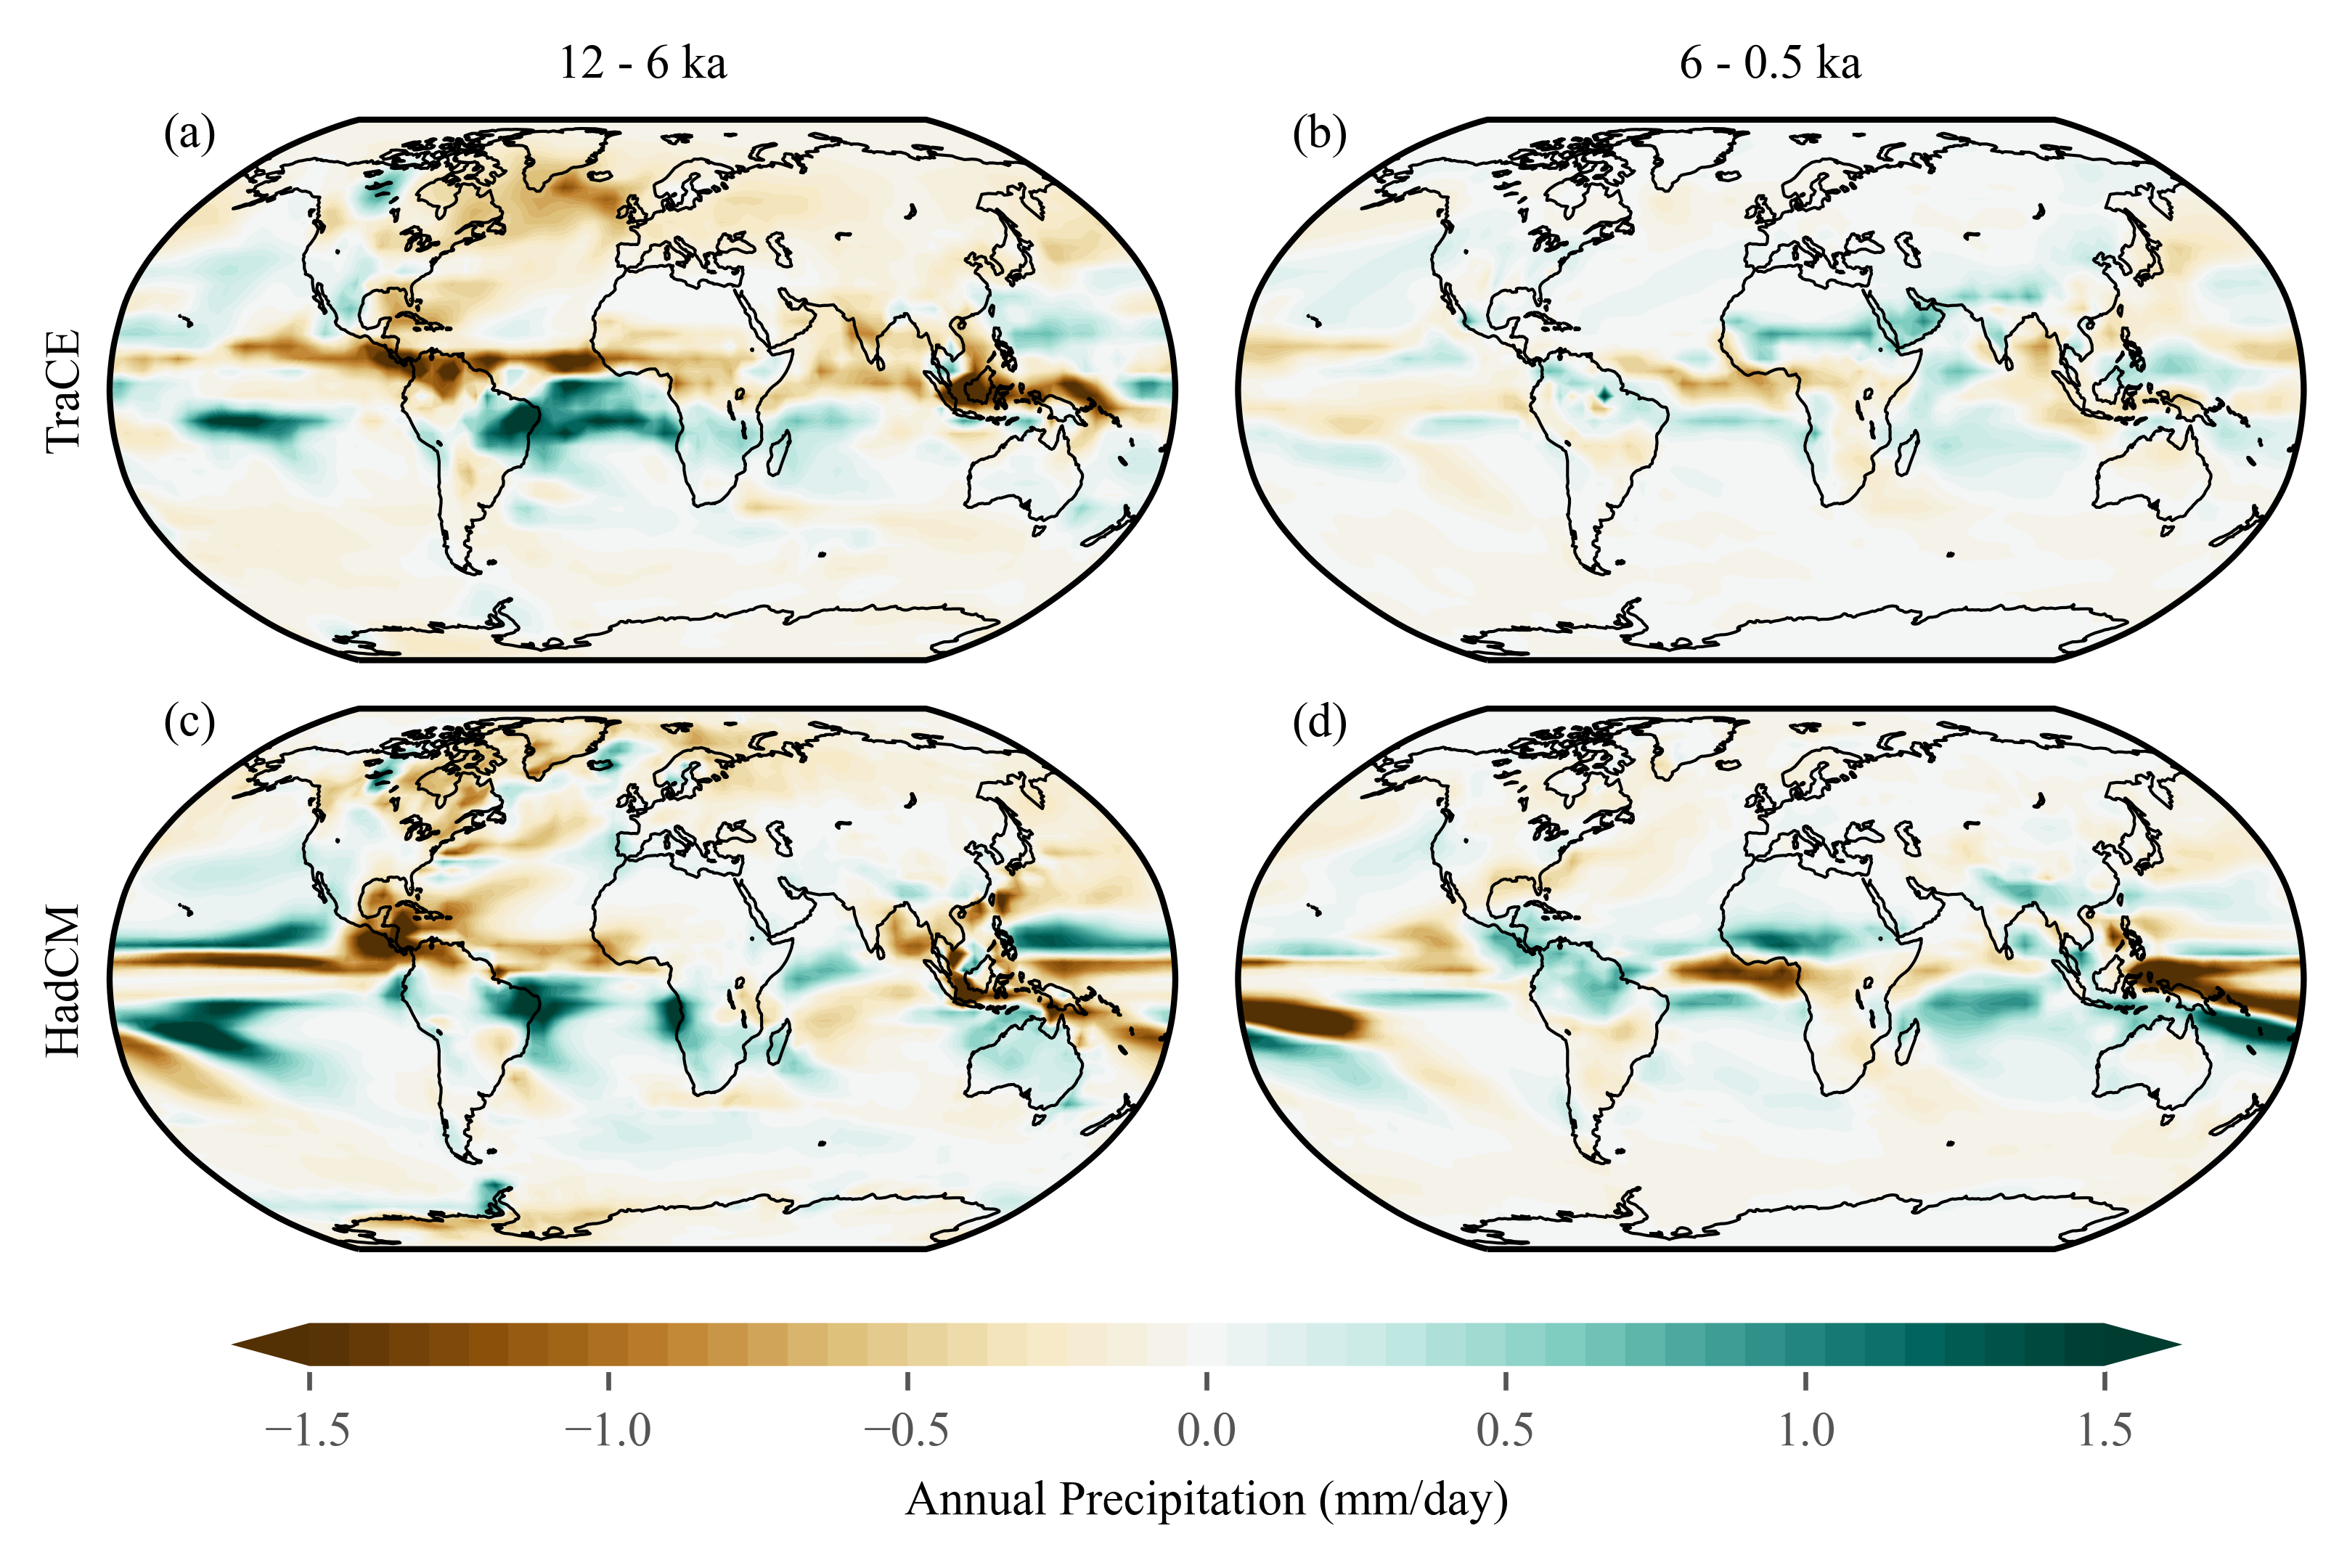

plot saved


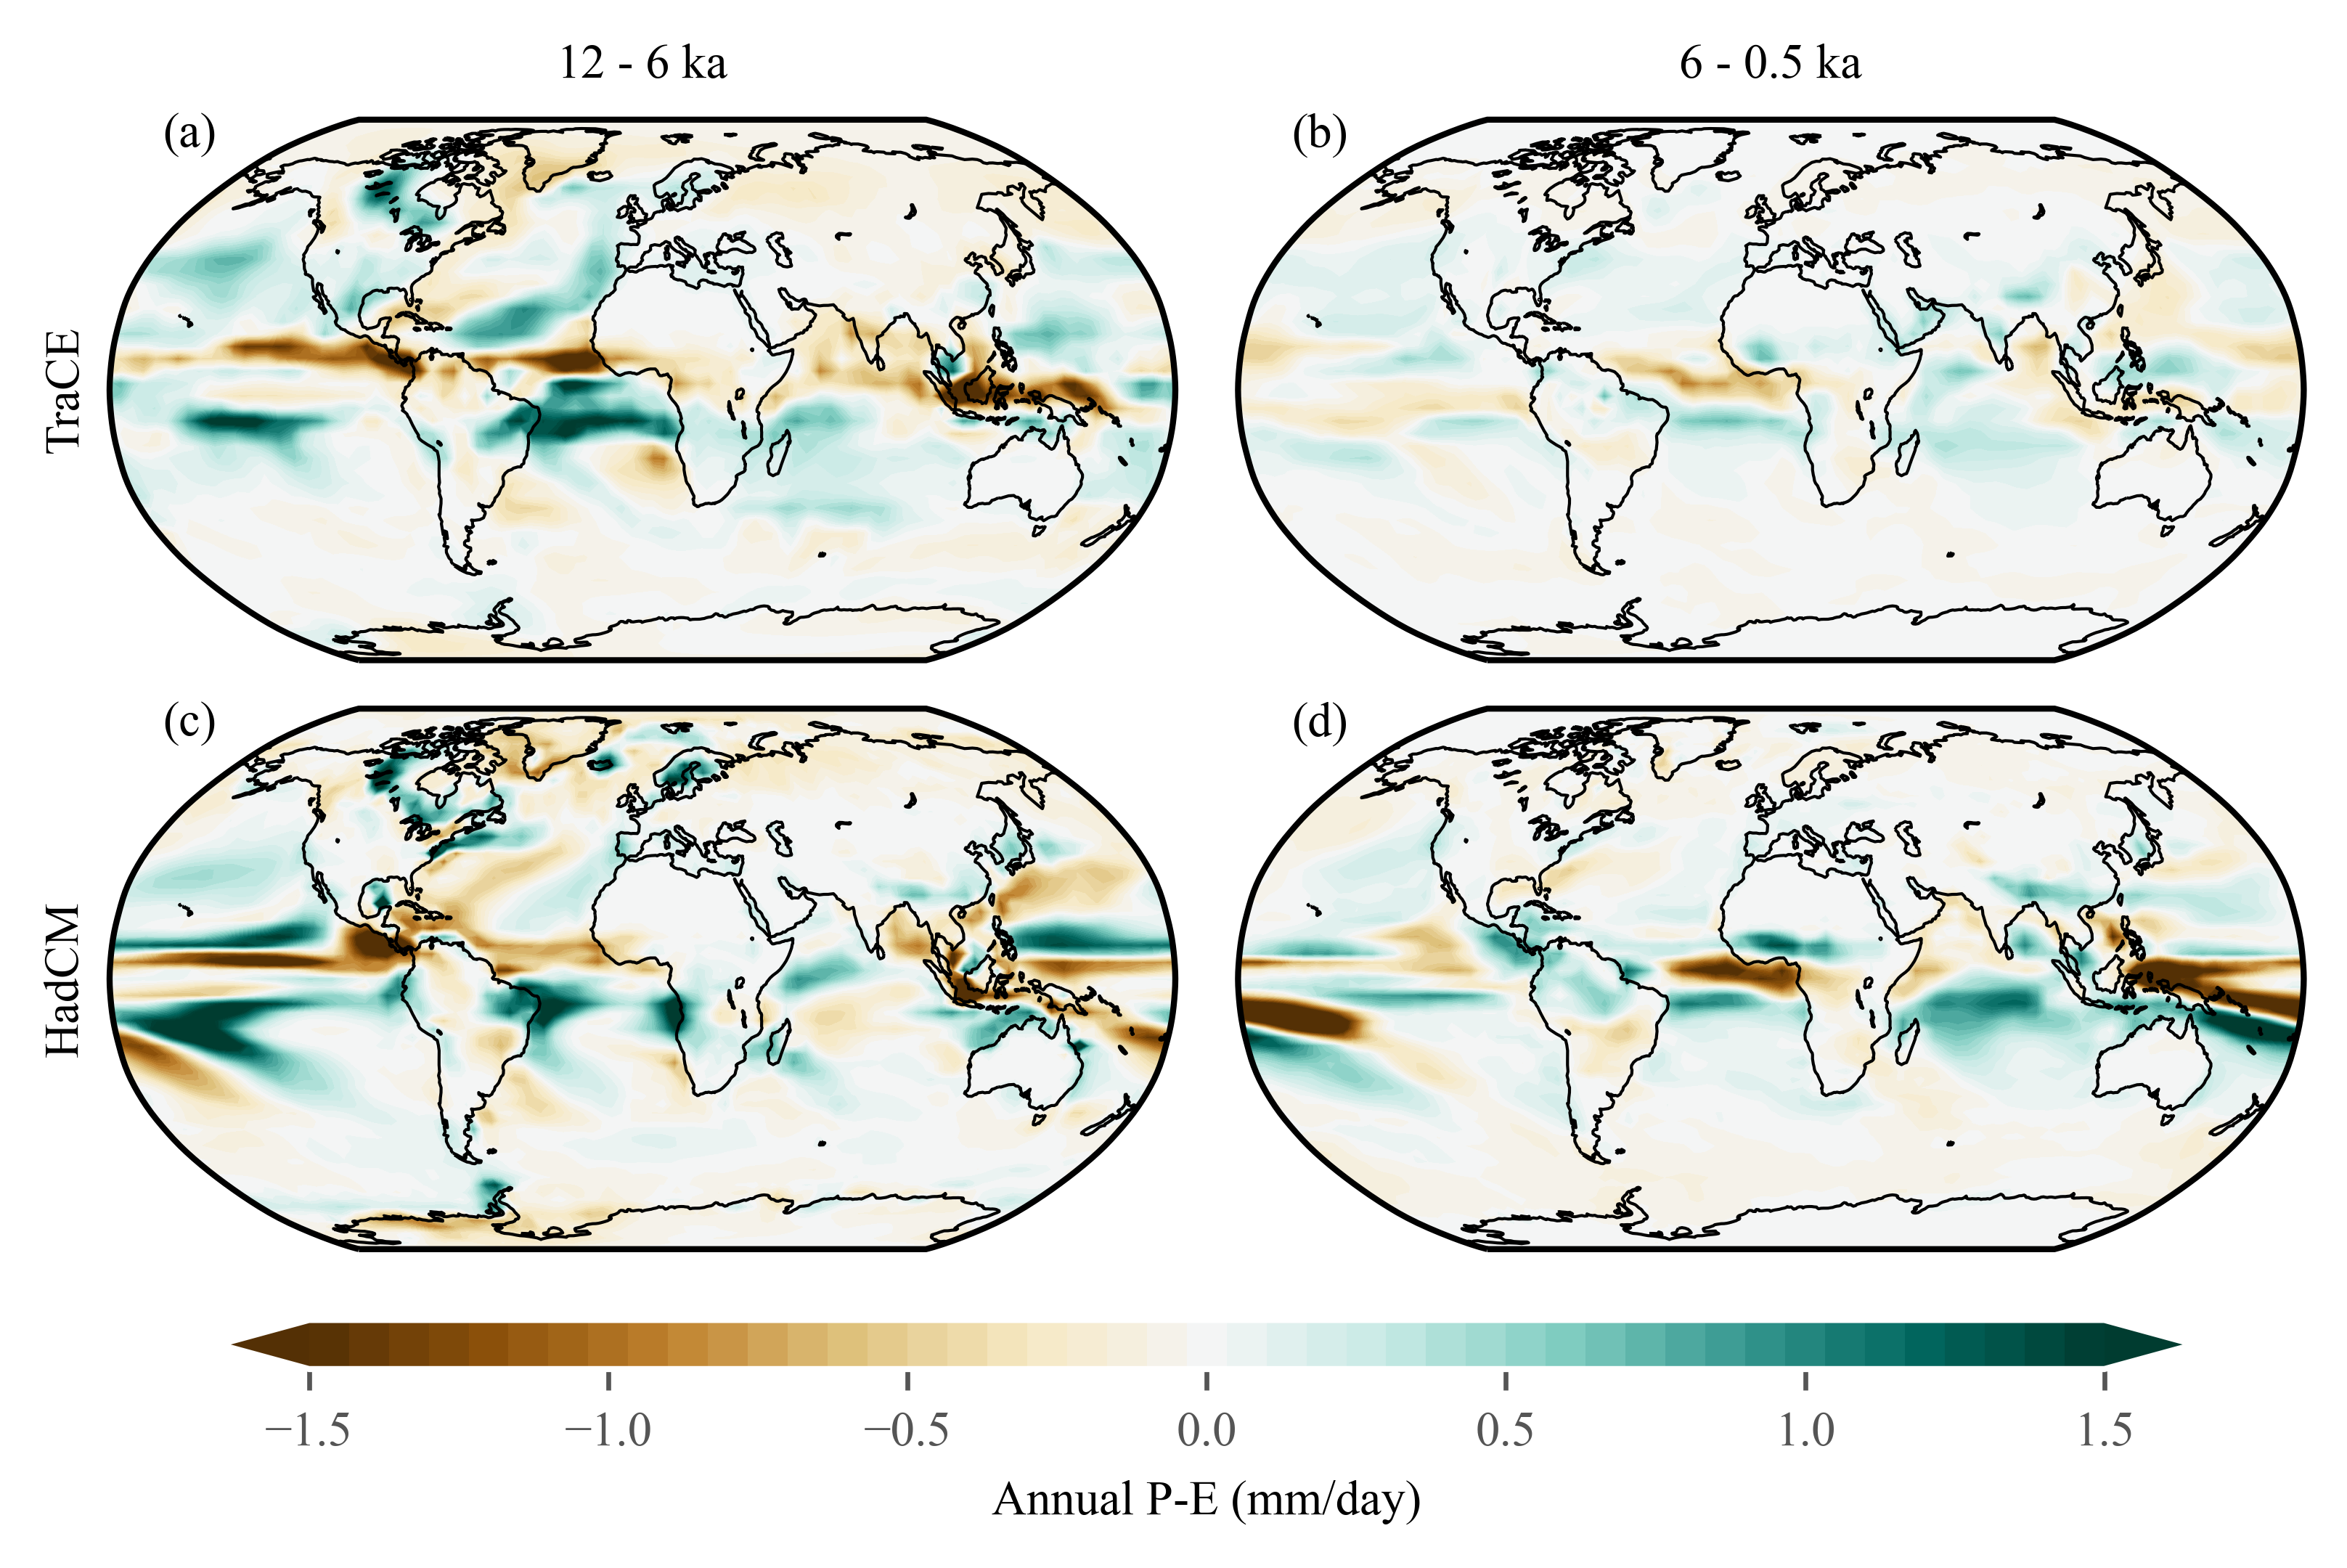

plot saved


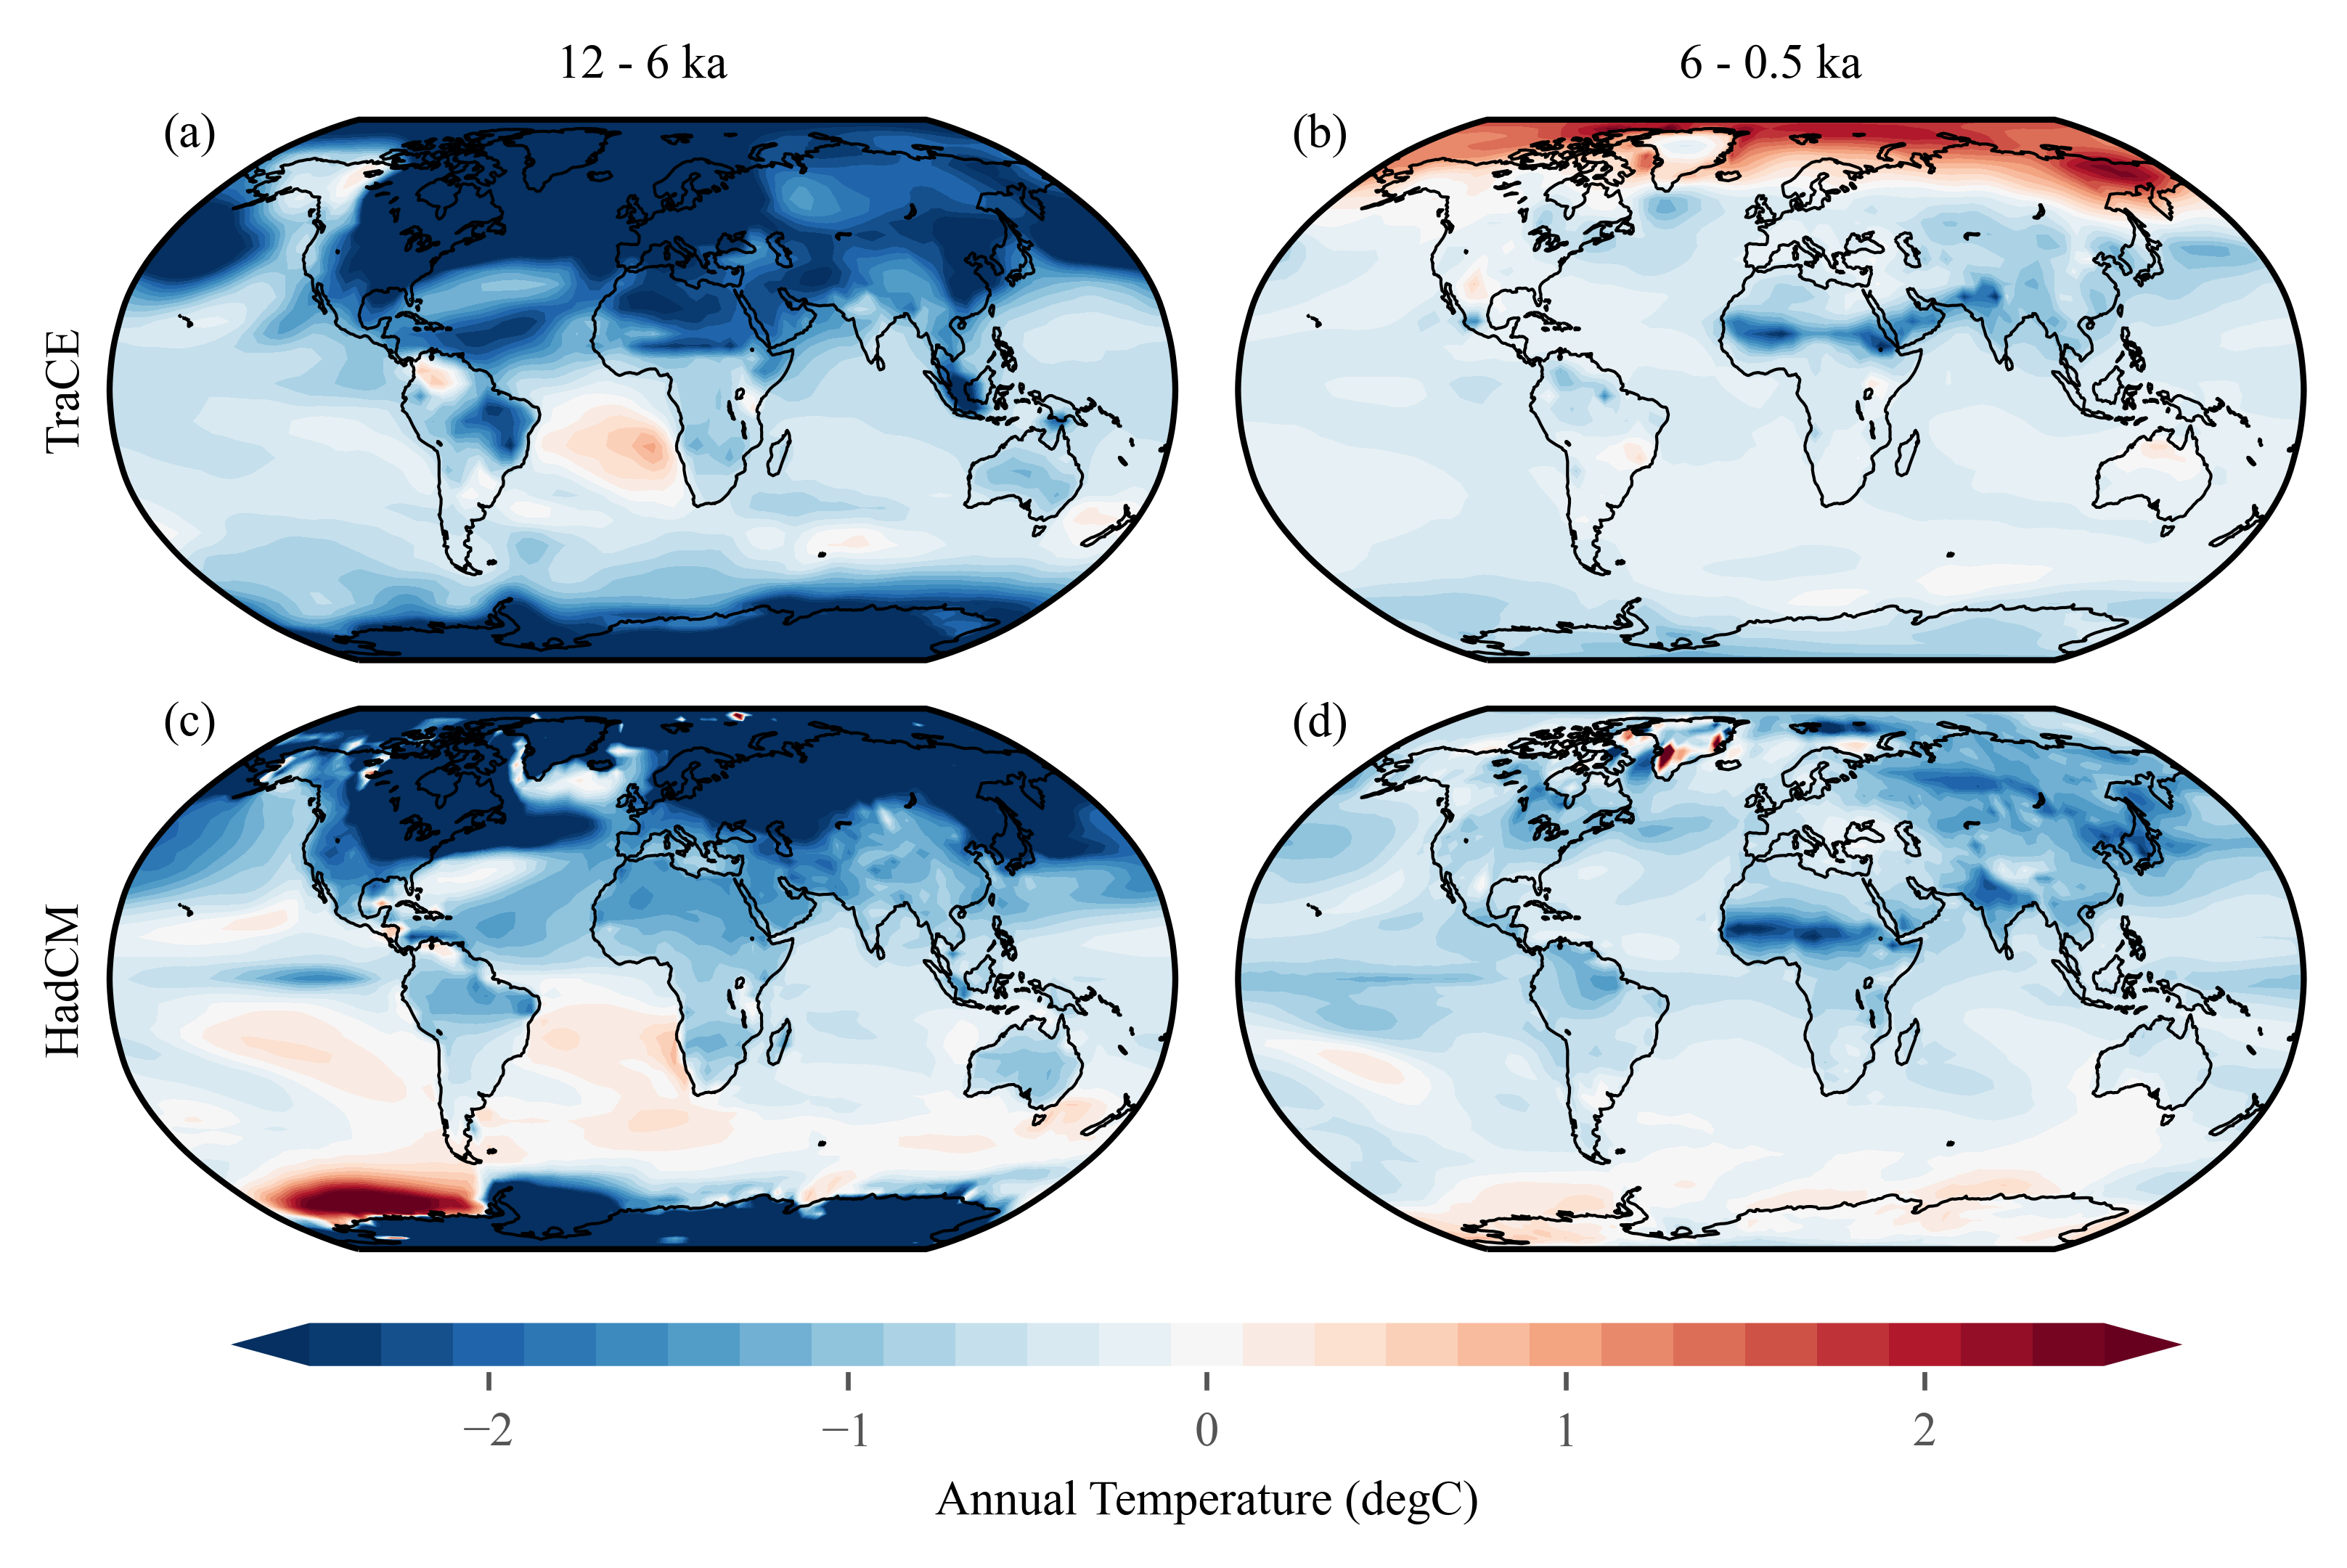

In [7]:
s = 3
for var in variables:
    label=0
    labels = ['b','d','a','c']#list(map(chr, range(97, 123)))
    if var == 'tas': 
        cramp, units, varname, n = 'RdBu_r','degC', 'Temperature', ['Cooler at 6 ka','Warmer at 6 ka']
        mlevels = np.array([i /100 for i in list(range(-250,251,20))])
        ticklabels = [-2.0,-1.0,0,1.0,2.0]
    else:            
        cramp, units, varname, n = 'BrBG', 'mm/day', 'Precipitation', ['Drier at 6 ka','Wetter at 6 ka',]
        if var != 'pre': varname = var.upper()
        mlevels = np.linspace(-1.5,1.5,46)
        ticklabels = np.linspace(-1.5,1.5,7)
    #Plot Figure
    plt.style.use('ggplot')
    plt.figure(figsize=(3.25*len(transmodels),4),dpi=600); 
    h  = len(['ANN'])*(len(ka)-1)
    gs = gridspec.GridSpec(h*s+1,len(transmodels)*s)
    for t in range(0,len(ka)-1):
        for model in transmodels:
            for szn in ['ANN']:
                #Format Data For Model/Season/Time
                data  = modelData[model][szn][var]
                data0 = data.groupby_bins('age',[ka[t]*1000-100,ka[t]*1000+100]).mean(dim='age')
                data1 = data.groupby_bins('age',[ka[t+1]*1000-100,ka[t+1]*1000+100]).mean(dim='age')
                data  = data0
                data.data = (data1.data-data0.data)
                data = data.squeeze('age_bins')
                i = [x for x, val in enumerate(seasons) if val == szn][0]
                j = [x for x, val in enumerate(transmodels) if val == model][0]
                if t == 0:   tt = 1
                elif t == 1: tt = 0
                #Plot Figure
                ax = plt.subplot(gs[j*s:j*s+s,(i+tt)*s:(i+tt)*s+s],projection=ccrs.Robinson()) 
                ax.spines['geo'].set_edgecolor('black')
                ax.set_global()
                ax.add_feature(cfeature.LAND,facecolor='whitesmoke',edgecolor='k')
                ax.add_feature(cfeature.LAKES,facecolor='none',edgecolor='k')
                #Plot Data
                data_cyclic,lon_cyclic = cutil.add_cyclic_point(data,coord=data.lon.data)
                model_contour = plt.contourf(lon_cyclic, data.lat.data, data_cyclic, levels= mlevels, extend='both', cmap=cramp, transform=ccrs.PlateCarree())
                #Annotate Plot
                if j == 0:
                    ax.annotate(str(ka[t+1])+' - '+str(ka[t])+' ka', xy=(0, 0), xycoords='data', fontsize=8,
                        xytext=(0.5, 1.1), textcoords='axes fraction', fontfamily = font,
                        horizontalalignment='center', verticalalignment='center')  
                if t == 0:
                    if   model == 'hadcm': modelName = 'HadCM'
                    elif model == 'trace': modelName = 'TraCE'
                    ax.annotate(modelName, xy=(0, 0), xycoords='data', fontsize=8,
                        xytext=(-1.1, 0.5), rotation=90, textcoords='axes fraction', fontfamily = font,
                        horizontalalignment='center', verticalalignment='center')  
                ax.annotate('('+labels[label]+')',xy=(0, 0), xycoords='data', xytext=(0.05, 0.95), textcoords='axes fraction', fontsize=8, fontfamily = font)
                ax.coastlines()
                label+=1
    ax = plt.subplot(gs[(h*s):(h*s+1),0:len(transmodels)*s])
    ax.axis('off')
    cbar = plt.colorbar(model_contour,cax=inset_axes(ax,width='90%',height="30%",loc="upper center",axes_kwargs={"fc": 'white'}),
                        orientation="horizontal",ticks=ticklabels).set_label('Annual '+varname+' ('+units+')',fontsize=8,c='black')
    plt.tick_params(labelsize=8)
    #Save Plot
    if save: 
        plt.savefig('Figures/Model/Anomalies/'+'Trans_Anoms_'+var+'.png', dpi=600,format='png', bbox_inches='tight')  
        print("plot saved")
    plt.show()